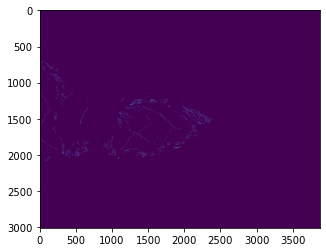

In [9]:
# %load p1.py
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('images/telenomus_001.tif',0)

size = np.size(img)
skel = np.zeros(img.shape,np.uint8)
 
ret,img = cv2.threshold(img,157,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False

plt.imshow(img)

while( not done):
    eroded = cv2.erode(img, element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img, temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy() #(img, element)
    
    _, maxval, _, _ = cv2.minMaxLoc(img)
    done = (maxval == 0)

plt.imshow(skel)
plt.show()
